In [1]:
import csv
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt

data = pd.read_csv("players_20.csv")
df = pd.DataFrame(data)

In [32]:
# 1. Load the csv file and show top 5 records from it. 

df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [33]:
# 2. How you would be able to see each column's name.

# list(data.columns)

for col in data.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [34]:
# 3. Need to show number of rows and columns of this dataset.

total_rows=len(data.axes[0]) #===> Axes of 0 is for a row
total_cols=len(data.axes[1]) #===> Axes of 0 is for a column

print("Number of Rows: " + str(total_rows))
print("Number of Columns: " + str(total_cols))


Number of Rows: 18278
Number of Columns: 104


In [13]:
# 4. Show number of players and their countries.
# print(df["nationality"])

result = ps.sqldf("""
                    select
                        nationality as "Countries", count(*) as "# of Players"
                        from df group by nationality;
                    """)

print(result)

# df[['nationality']]

             Countries  # of Players
0          Afghanistan             2
1              Albania            43
2              Algeria            50
3               Angola            16
4    Antigua & Barbuda             7
..                 ...           ...
157          Venezuela            66
158            Vietnam             1
159              Wales           117
160             Zambia            10
161           Zimbabwe            12

[162 rows x 2 columns]


In [5]:
# 5. If you find many records in point 4 then show only top 10 countries and their number of players.

result = ps.sqldf("""
                    select
                        nationality as "Countries", count(*) as "# of Players", AVG(overall) as "AVG Overall"
                        from df group by nationality order by AVG(overall) desc limit 10;
                    """)

print(result)

    Countries  # of Players  AVG Overall
0  Mozambique             4    73.250000
1        Chad             1    73.000000
2     Bahrain             1    72.000000
3     Uruguay           164    71.646341
4     Algeria            50    71.380000
5      Brazil           824    71.161408
6      Israel            16    71.125000
7       Libya             4    71.000000
8     Eritrea             1    71.000000
9       Gabon            16    70.687500


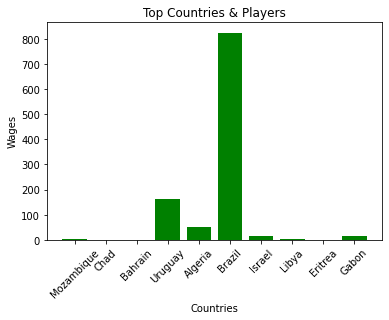

In [6]:
# 6. Now you have to create a bar plot of top 5 countries and their number of players, try to fill green color in bars.
x_axis = result.iloc[:,0]
y_axis = result.iloc[:,1]

plt.bar(x_axis, y_axis, color = 'green')
plt.xlabel("Countries")
plt.ylabel("Wages")
plt.title("Top Countries & Players")
plt.xticks(rotation = 45)   # rotate 45 to get clearer x axis
plt.show()

In [35]:
# 7. Show top 5 players short name and wages.

df[['short_name','wage_eur']].head()

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


In [8]:
# 8. Show top 5 players short name and wages that are getting highest salaries.

result_wages = df[['short_name','wage_eur']].nlargest(5, 'wage_eur')
print(result_wages)

           short_name  wage_eur
0            L. Messi    565000
4           E. Hazard    470000
1   Cristiano Ronaldo    405000
5        K. De Bruyne    370000
22       A. Griezmann    370000


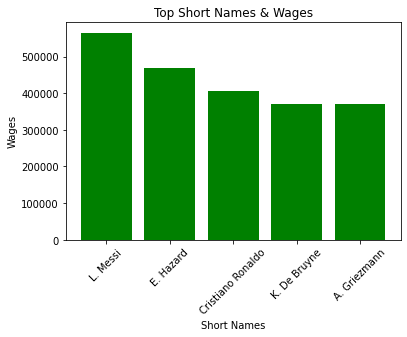

In [9]:
# 9. Create a bar plot of point number 8.
x_axis = result_wages.iloc[:,0]
y_axis = result_wages.iloc[:,1]

plt.bar(x_axis, y_axis, color = 'green')
plt.xlabel("Short Names")
plt.ylabel("Wages")
plt.title("Top Short Names & Wages")
plt.xticks(rotation = 45)   # rotate 45 to get clearer x axis
plt.show()

In [37]:
# 10. Show top 10 records of Germany.

df.loc[ (df['nationality']=='Germany') ].head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
61,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Kimmich,24,1995-02-08,176,73,Germany,FC Bayern München,...,83+3,82+3,82+3,82+3,83+3,81+3,78+3,78+3,78+3,81+3
70,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2
109,235790,https://sofifa.com/player/235790/kai-havertz/2...,K. Havertz,Kai Havertz,20,1999-06-11,188,83,Germany,Bayer 04 Leverkusen,...,65+2,63+2,63+2,63+2,65+2,62+2,54+2,54+2,54+2,62+2


In [38]:
# 11. Now show top 5 records of Germany players who have maximum height, weight and wages.

df[['short_name','height_cm','weight_kg','wage_eur']].loc[ (df['nationality']=='Germany') ].nlargest(5, 'height_cm')

,short_name,height_cm,weight_kg,wage_eur
8016,A. Seydel,199,90,9000
1217,M. Esser,198,97,23000
1389,L. Unnerstall,198,103,14000
518,R. Fährmann,197,98,43000
4449,T. Kessler,197,92,12000


In [39]:
# 12. Show short name and wages of top 5 Germany players.

df[['short_name','wage_eur']].loc[ (df['nationality']=='Germany') ].nlargest(5, 'wage_eur')

,short_name,wage_eur
36,T. Kroos,330000
6,M. ter Stegen,250000
55,L. Sané,195000
146,I. Gündoğan,180000
37,M. Reus,170000


In [40]:
# 13. Show top 5 players who have great shooting skills among all with short name.

df[['short_name','shooting']].loc[ (df['nationality']=='Germany') ].nlargest(5, 'shooting')

,short_name,shooting
37,M. Reus,88.0
276,K. Volland,84.0
70,T. Müller,83.0
217,M. Kruse,83.0
120,S. Gnabry,82.0


In [41]:
# 14. Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills.

df[['short_name','defending','nationality','club']].nlargest(5, 'defending')

,short_name,defending,nationality,club
7,V. van Dijk,90.0,Netherlands,Liverpool
16,G. Chiellini,90.0,Italy,Juventus
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter
49,M. Hummels,89.0,Germany,Borussia Dortmund


In [42]:
# 15. Show wages records of top 5 players of 'Real Madrid' team.

df[['short_name','wage_eur','nationality','club']].loc[ (df['club']=='Real Madrid') ].nlargest(5, 'wage_eur')

,short_name,wage_eur,nationality,club
4,E. Hazard,470000,Belgium,Real Madrid
8,L. Modrić,340000,Croatia,Real Madrid
36,T. Kroos,330000,Germany,Real Madrid
18,Sergio Ramos,300000,Spain,Real Madrid
46,K. Benzema,285000,France,Real Madrid


In [43]:
# 16. Show shooting records of top 5 players of 'Real Madrid' team.

df[['short_name','shooting','nationality','club']].loc[ (df['club']=='Real Madrid') ].nlargest(5, 'shooting')

,short_name,shooting,nationality,club
100,G. Bale,87.0,Wales,Real Madrid
106,J. Rodríguez,86.0,Colombia,Real Madrid
4,E. Hazard,83.0,Belgium,Real Madrid
46,K. Benzema,82.0,France,Real Madrid
161,L. Jović,82.0,Serbia,Real Madrid


In [44]:
# 17. Show defending records of top 5 players of 'Real Madrid' team.

df[['short_name','defending','nationality','club']].loc[ (df['club']=='Real Madrid') ].nlargest(5, 'defending')

,short_name,defending,nationality,club
18,Sergio Ramos,87.0,Spain,Real Madrid
42,Casemiro,85.0,Brazil,Real Madrid
76,R. Varane,85.0,France,Real Madrid
94,Carvajal,82.0,Spain,Real Madrid
277,Nacho Fernández,81.0,Spain,Real Madrid


In [45]:
# 18. Show nationality records of top 5 players of 'Real Madrid' team.

df[['short_name','overall','nationality','club']].loc[ (df['club']=='Real Madrid') ].nlargest(5, 'overall')

,short_name,overall,nationality,club
4,E. Hazard,91,Belgium,Real Madrid
8,L. Modrić,90,Croatia,Real Madrid
18,Sergio Ramos,89,Spain,Real Madrid
28,T. Courtois,88,Belgium,Real Madrid
36,T. Kroos,88,Germany,Real Madrid
